In [1]:
import torch
from torch import nn
import FashionMnistTool as fmt
import ch3

In [2]:
batch_size = 256
train_iter, test_iter = fmt.load_data_fashion_mnist(batch_size)

初始化参数模型

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

激活函数

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)  

模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # 这⾥“@”代表矩阵乘法
    return (H@W2 + b2)

损失函数

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

训练

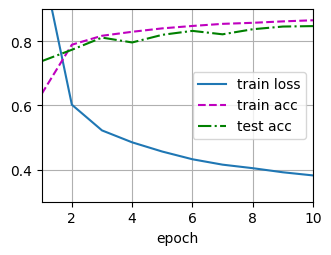

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
ch3.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

测试

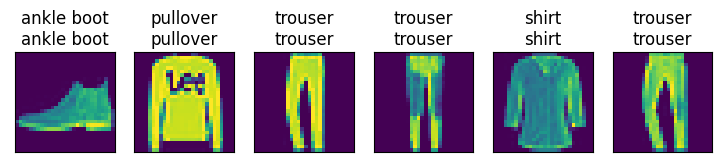

In [8]:
ch3.predict_ch3(net, test_iter)